## Heart Failure Prediction

## Introduction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease. People with cardiovascular disease or who are at high cardiovascular risk need early detection and management wherein a machine learning model can be of great help.


## Problem Statement

To predict the chances of heart failure and studying the factors associated with it (such as Cholesterol levels, type of ChestPain, Heart Rate, Blood Pressure)

## Installing Packages

In [1]:
install.packages('ggpubr') #boxplots togather in 1 frame
install.packages('caTools') #splitting - training and testing
install.packages('rpart') #decision tree
install.packages('rpart.plot') 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("ggthemes")  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("plotrix", repos ="https://cran.us.r-project.org") 
library(plotrix)  #

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("caret") 
library(caret)  #logistic regression library

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


## Importing Libraries

In [5]:
library(ggplot2)
library(tidyverse)
library(ggthemes)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()



In [42]:
library(caTools)
library(rpart)
library(rpart.plot)

## Loading .csv file

In [6]:
heart_df <- read.csv("https://raw.githubusercontent.com/heetc27/Heart-Failure-Prediction/main/heart.csv")
head(heart_df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [7]:
head(heart_df,3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0,Up,0


In [8]:
dim(heart_df)
glimpse(heart_df)

[1] 918  12

Rows: 918
Columns: 12
$ Age            <int> 40, 49, 37, 48, 54, 39, 45, 54, 37, 48, 37, 58, 39, 49,…
$ Sex            <chr> "M", "F", "M", "F", "M", "M", "F", "M", "M", "F", "F", …
$ ChestPainType  <chr> "ATA", "NAP", "ATA", "ASY", "NAP", "NAP", "ATA", "ATA",…
$ RestingBP      <int> 140, 160, 130, 138, 150, 120, 130, 110, 140, 120, 130, …
$ Cholesterol    <int> 289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, …
$ FastingBS      <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ RestingECG     <chr> "Normal", "Normal", "ST", "Normal", "Normal", "Normal",…
$ MaxHR          <int> 172, 156, 98, 108, 122, 170, 170, 142, 130, 120, 142, 9…
$ ExerciseAngina <chr> "N", "N", "N", "Y", "N", "N", "N", "N", "Y", "N", "N", …
$ Oldpeak        <dbl> 0.0, 1.0, 0.0, 1.5, 0.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.0, …
$ ST_Slope       <chr> "Up", "Flat", "Up", "Flat", "Up", "Up", "Up", "Up", "Fl…
$ HeartDisease   <int> 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1…


In [9]:
summary(heart_df)

      Age            Sex            ChestPainType        RestingBP    
 Min.   :28.00   Length:918         Length:918         Min.   :  0.0  
 1st Qu.:47.00   Class :character   Class :character   1st Qu.:120.0  
 Median :54.00   Mode  :character   Mode  :character   Median :130.0  
 Mean   :53.51                                         Mean   :132.4  
 3rd Qu.:60.00                                         3rd Qu.:140.0  
 Max.   :77.00                                         Max.   :200.0  
  Cholesterol      FastingBS       RestingECG            MaxHR      
 Min.   :  0.0   Min.   :0.0000   Length:918         Min.   : 60.0  
 1st Qu.:173.2   1st Qu.:0.0000   Class :character   1st Qu.:120.0  
 Median :223.0   Median :0.0000   Mode  :character   Median :138.0  
 Mean   :198.8   Mean   :0.2331                      Mean   :136.8  
 3rd Qu.:267.0   3rd Qu.:0.0000                      3rd Qu.:156.0  
 Max.   :603.0   Max.   :1.0000                      Max.   :202.0  
 ExerciseAngina     

From the summary of the data, we observe that: 


* Resting BP and Cholesterol has zero as minimum which is not possible unless the patient is dead.  
* There may be outliers/Missings in Cholesterol and Resting BP being presented as zero.
*   The interquartile range of MaxHR suggests that there maybe outliers from Min to 1st quartile 









## Data Cleaning 

### 1. Fixing Cholestrol values
It is impossible to have zero cholesterol. Hence it is highly possible it was introduced by error

In [10]:
# replacing the zero cholesterol with the mean cholesterol
heart_df$Cholesterol[which(heart_df$Cholesterol == 0)] <- mean(heart_df$Cholesterol) 

### 2. Fixing BP values
Dataset suggests that zero resting bp is for the dead. Hence it might have been introduced into the data set by mistake. We'll fix that by inserting the mean of that variables.

In [11]:
# replacing the zero values of RestingBP with mean RestingBP
heart_df$RestingBP[which(heart_df$RestingBP == 0)] <- mean(heart_df$RestingBP) 
summary(heart_df) #notice the mean and median of cholesterol is now close.

      Age            Sex            ChestPainType        RestingBP    
 Min.   :28.00   Length:918         Length:918         Min.   : 80.0  
 1st Qu.:47.00   Class :character   Class :character   1st Qu.:120.0  
 Median :54.00   Mode  :character   Mode  :character   Median :130.0  
 Mean   :53.51                                         Mean   :132.5  
 3rd Qu.:60.00                                         3rd Qu.:140.0  
 Max.   :77.00                                         Max.   :200.0  
  Cholesterol      FastingBS       RestingECG            MaxHR      
 Min.   : 85.0   Min.   :0.0000   Length:918         Min.   : 60.0  
 1st Qu.:198.8   1st Qu.:0.0000   Class :character   1st Qu.:120.0  
 Median :223.0   Median :0.0000   Mode  :character   Median :138.0  
 Mean   :236.0   Mean   :0.2331                      Mean   :136.8  
 3rd Qu.:267.0   3rd Qu.:0.0000                      3rd Qu.:156.0  
 Max.   :603.0   Max.   :1.0000                      Max.   :202.0  
 ExerciseAngina     

## EDA and Visualization

## Univariate Analysis

### 1. Plotting a bar graph of number of heart disease cases between males and females 

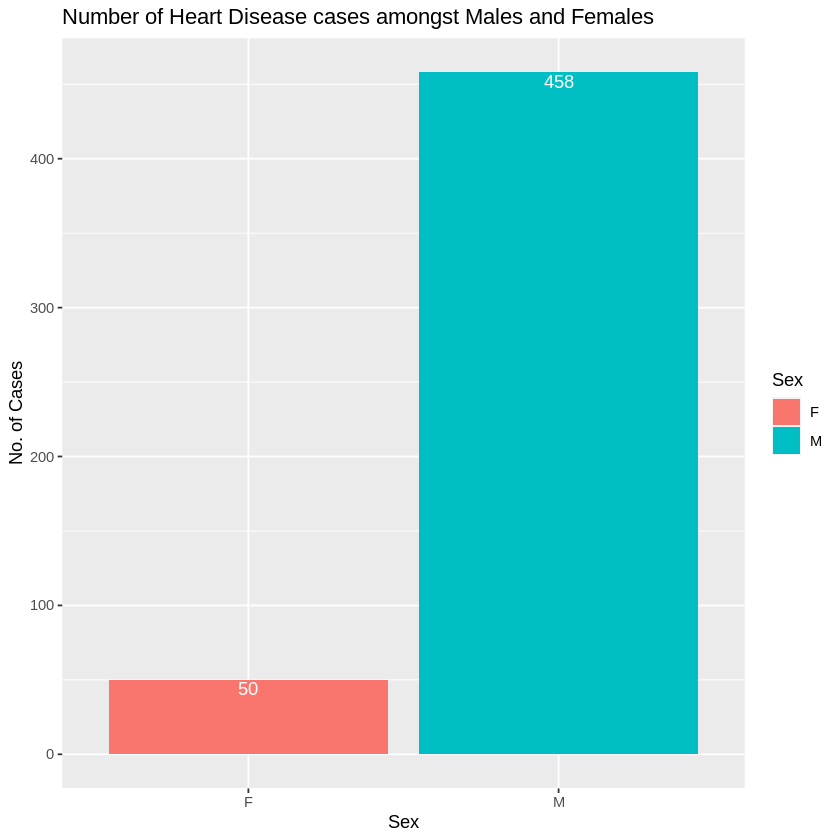

In [12]:
ggplot(data = filter(heart_df, HeartDisease == 1), aes(x = Sex, fill = Sex)) +
geom_bar() + 
geom_text(aes(label = ..count..), 
            stat = 'count', vjust = 1.2, colour = 'white') +
  labs(title = 'Number of Heart Disease cases amongst Males and Females',
       y = 'No. of Cases',
       x = 'Sex')

### Checking for Outliers

### 2. Plotting a box plot of outliers in cholesterol, Resting BP and Max HR values.

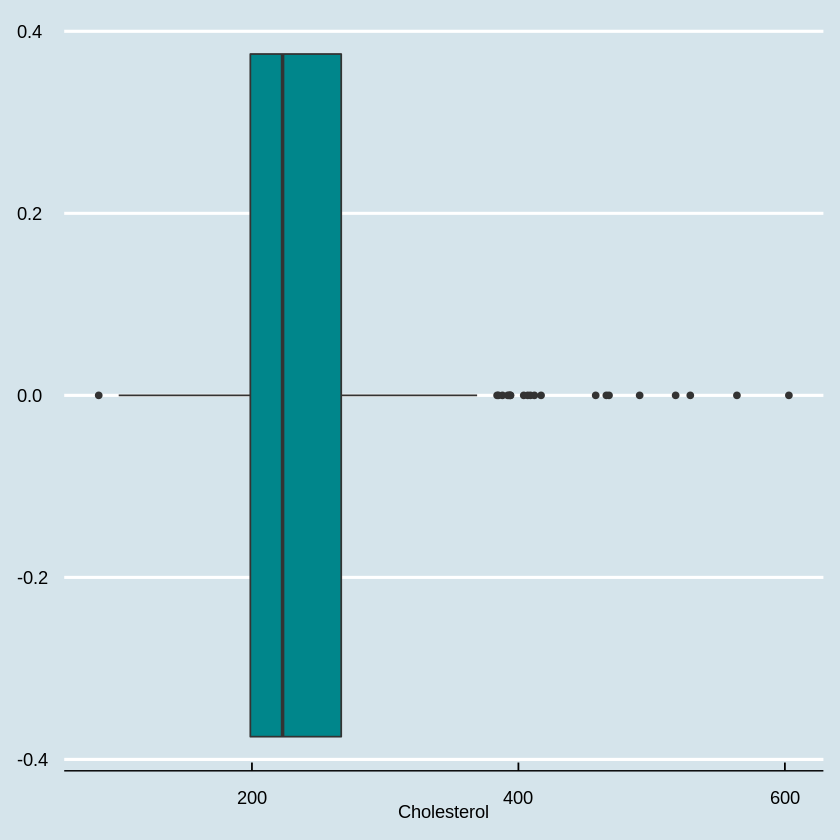

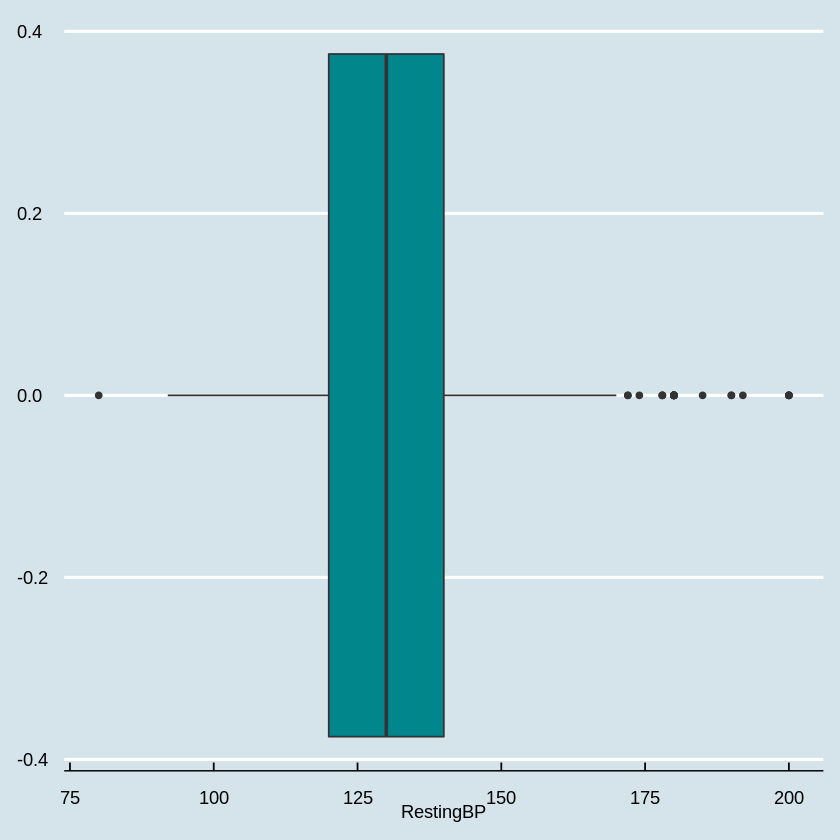

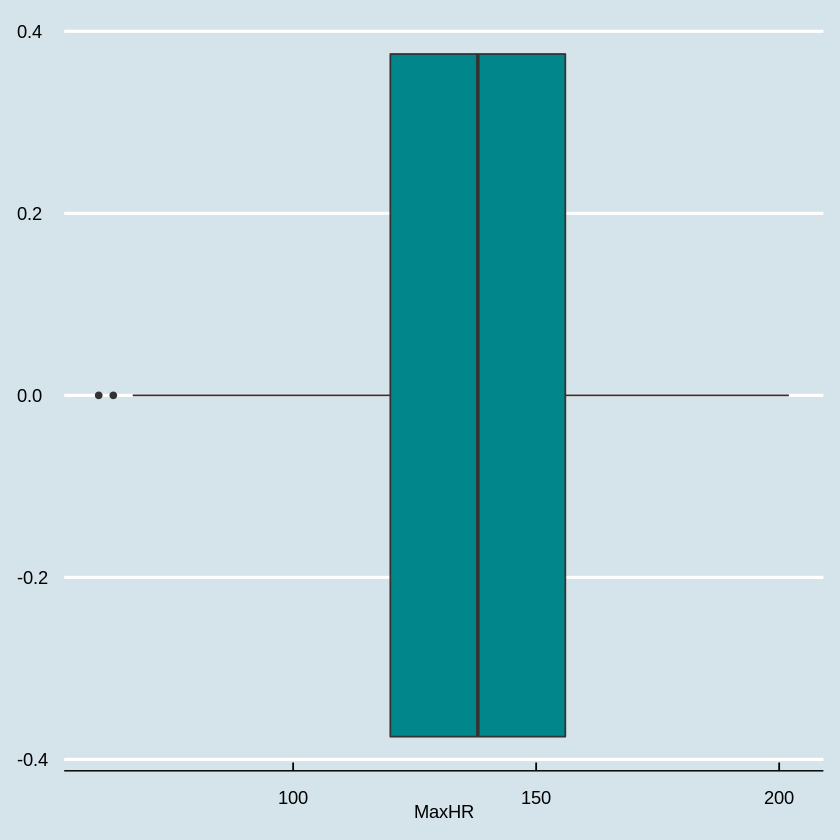

In [13]:
chlout <- ggplot(data = heart_df, aes(x = Cholesterol))+
  geom_boxplot(fill ='turquoise4')
rbpout <- ggplot(data = heart_df, aes(x = RestingBP))+
  geom_boxplot(fill ='turquoise4')
maxhrout <- ggplot(data = heart_df, aes(x = MaxHR))+
  geom_boxplot(fill ='turquoise4')  
chlout + theme_economist()
rbpout + theme_economist()
maxhrout + theme_economist()

### 3. Plotting a histogram of Age Distribution

In [14]:
table(heart_df$Age)


28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 
 1  3  1  2  5  2  7 11  6 11 16 15 13 24 18 24 19 18 24 19 31 21 25 35 36 33 
54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 
51 41 38 38 42 35 32 31 35 30 22 21 13 15 10 13  7  5  4  1  7  3  2  2 

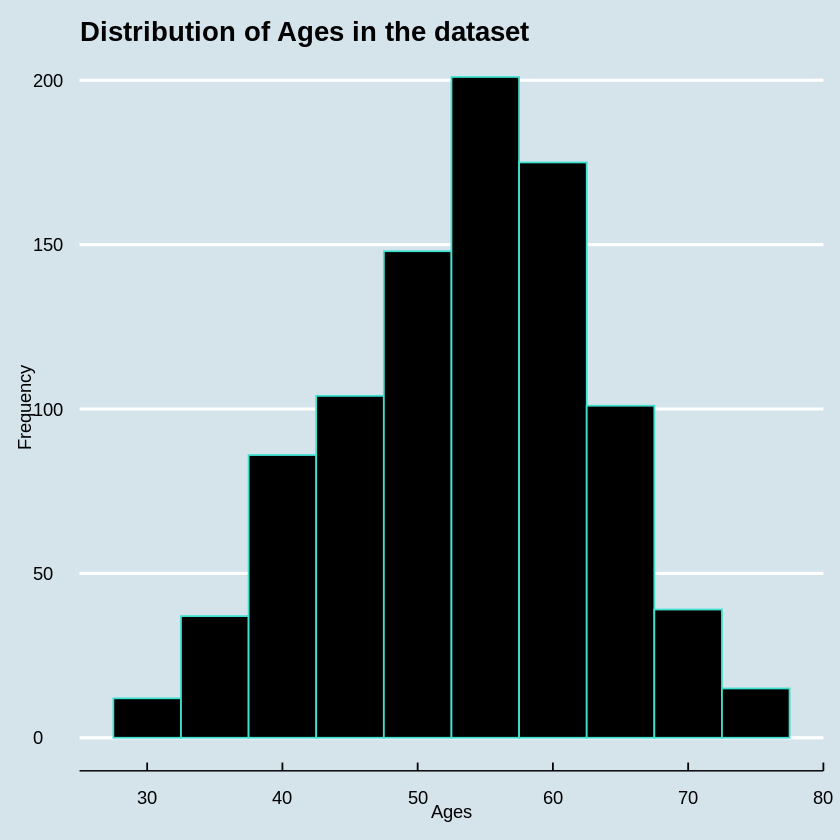

In [15]:
ggplot(data = heart_df,aes(x= Age)) +
geom_histogram( binwidth = 5, color = 'turquoise', fill = 'black') + theme_economist() +
labs(title = 'Distribution of Ages in the dataset',
       y = 'Frequency',
       x = 'Ages')

Creating a new column called age group with ages ranging as 20-34, 35-44, 45-54, 55-64, 65-77

In [16]:
heart_df2 <- heart_df #Creates a different copy data frame for age group imputation
heart_df2$AgeGroup[heart_df2$Age >20 & heart_df2$Age <35 ] <- '20 - 34'
heart_df2$AgeGroup[heart_df2$Age >34 & heart_df2$Age <45 ] <- '35 - 44'
heart_df2$AgeGroup[heart_df2$Age >44 & heart_df2$Age <55 ] <- '45 - 54'
heart_df2$AgeGroup[heart_df2$Age >54 & heart_df2$Age <65 ] <- '55 - 64'
heart_df2$AgeGroup[heart_df2$Age >64 & heart_df2$Age <78 ] <- '65 - 77'
head(heart_df2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,35 - 44
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,45 - 54
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,35 - 44
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,45 - 54
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,45 - 54
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,35 - 44


Creating a dataframe with number of cases for each group with existing heart disease (HeartDisease == 1) and their mean cholesterol values.

In [17]:
sum_heart_df2 <- heart_df2 %>%
  filter(HeartDisease == 1) %>% #filters for those diagnosed with heart disease
  group_by(AgeGroup) %>% #groups by age group
  summarise(NumberofCases = n(), #gets me the number of participants in each group
  MeanCholesterol = mean(Cholesterol), #gets me the mean cholesterol
  MeanHR = mean(MaxHR))
head(sum_heart_df2)

AgeGroup,NumberofCases,MeanCholesterol,MeanHR
<chr>,<int>,<dbl>,<dbl>
20 - 34,6,266.4332,149.0000
35 - 44,52,239.5345,141.1731
45 - 54,139,239.4258,129.3381
55 - 64,239,233.5639,125.2427
65 - 77,72,228.3221,120.8750


### Plotting a histogram of number of Heart Disease cases according to age group

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


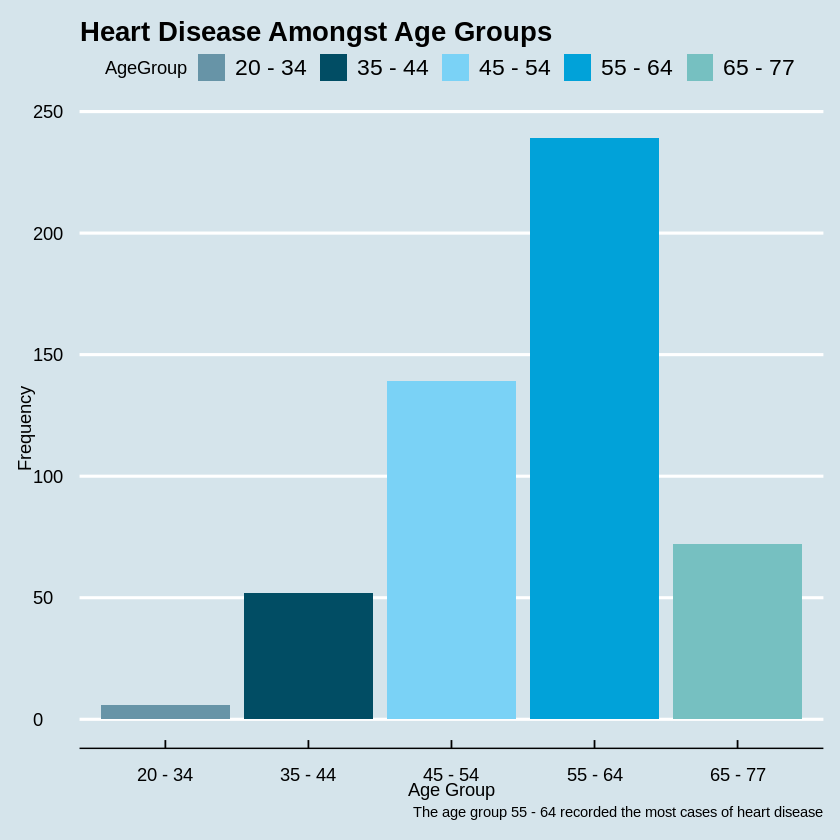

In [18]:
ggplot(data = sum_heart_df2, aes(x = AgeGroup, y = NumberofCases, fill = AgeGroup))+
  geom_histogram(stat = 'identity') + theme_economist() + scale_fill_economist() +
  labs(title = 'Heart Disease Amongst Age Groups',
       caption = 'The age group 55 - 64 recorded the most cases of heart disease',
       y = 'Frequency',
       x = 'Age Group')

### 4. Plotting a pie chart of Chest Pain Types

ChestPainType,n,perc,"""%"""
<chr>,<int>,<dbl>,<chr>
ASY,496,54,%
ATA,173,19,%
NAP,203,22,%
TA,46,5,%


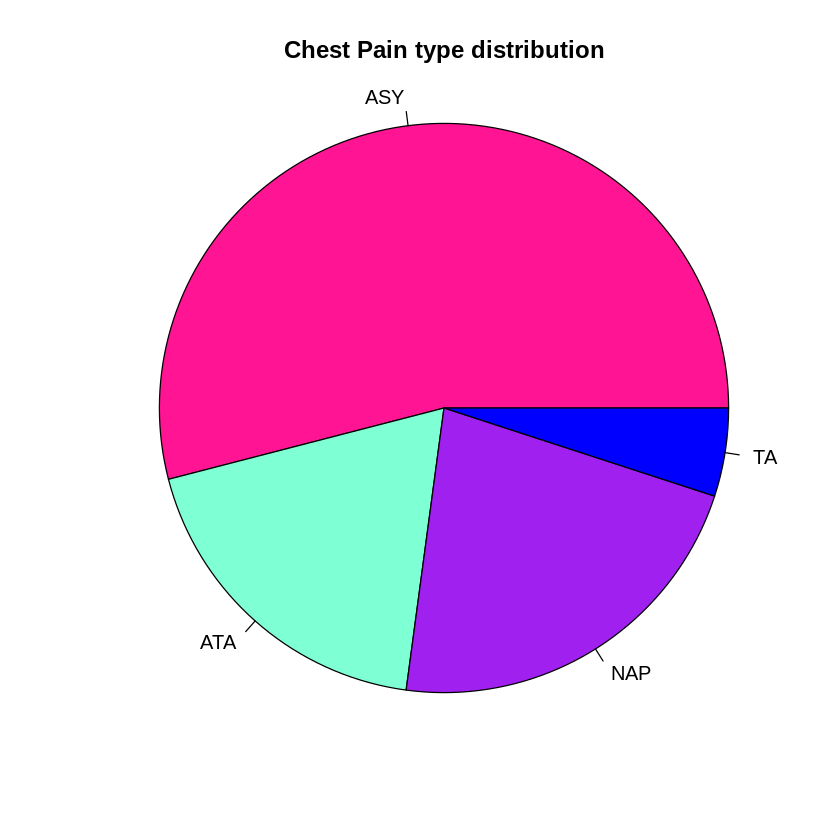

In [19]:
class_type = heart_df %>% count(ChestPainType)
class_type %>% mutate (perc =round( n/ sum(n)*100),"%")
pie(class_type$n, labels= class_type$ChestPainType, radius =1, col=c("deeppink", "aquamarine","purple","blue"), main="Chest Pain type distribution")

### Plotting a bar graph of Chest pain types and the count of each type where Heart Disease is diagnosed (HeartDisease == 1)

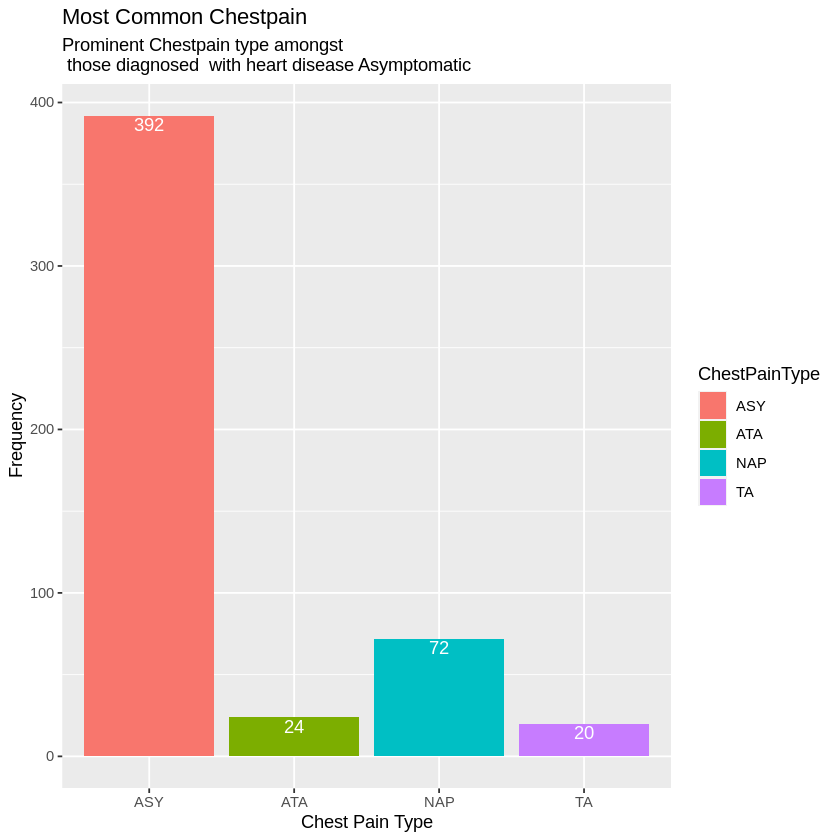

In [20]:
ggplot(data = filter(heart_df, HeartDisease == 1), aes(x = ChestPainType, fill = ChestPainType))+
  geom_bar() +
  geom_text(aes(label = ..count..), 
            stat = 'count', vjust = 1.2, colour = 'white') +
  labs(title = 'Most Common Chestpain',
       subtitle = 'Prominent Chestpain type amongst \n those diagnosed  with heart disease Asymptomatic',
       y = 'Frequency',
       x = 'Chest Pain Type')

### 5. Plotting a 3D pie chart of percentage of heart disease patients existing in the dataset 

In [21]:
prop.table(table(heart_df$HeartDisease))


        0         1 
0.4466231 0.5533769 

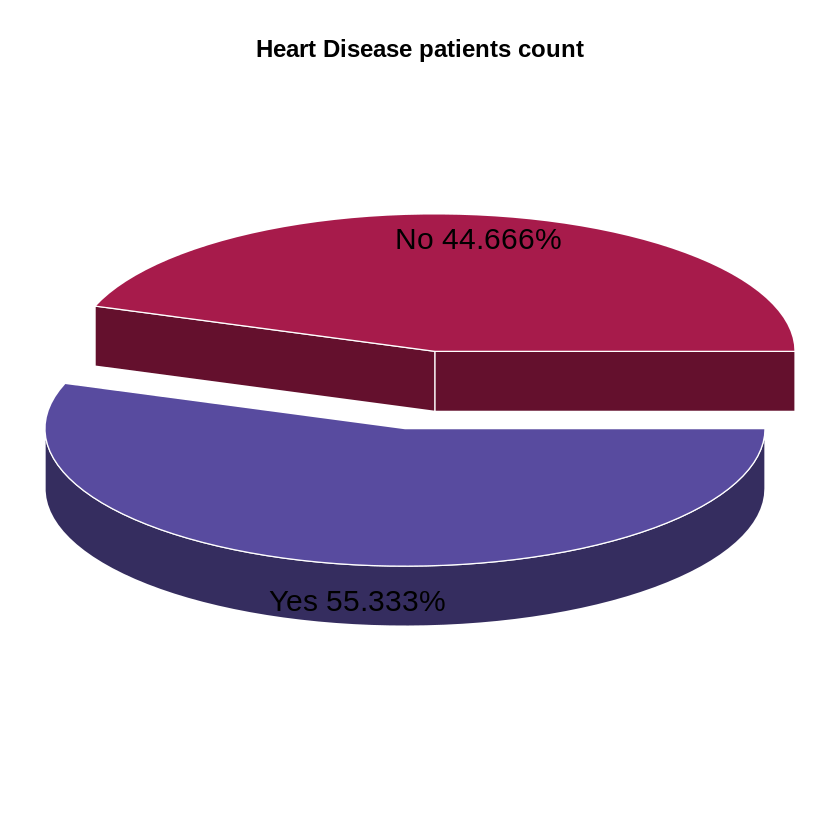

In [22]:
HeartDisease_count = heart_df %>% count(HeartDisease)
data <- c("No 44.666% ","Yes 55.333%")
pie3D(HeartDisease_count$n, labels = data, radius = 1.2,  col = hcl.colors(length(data), "Spectral"),border = "white", 
theta = 0.6, shade = 0.6, explode=0.3, main ="Heart Disease patients count")

## Bivariate Analysis

### 1. Bar Plot of Cholesterol levels among age groups

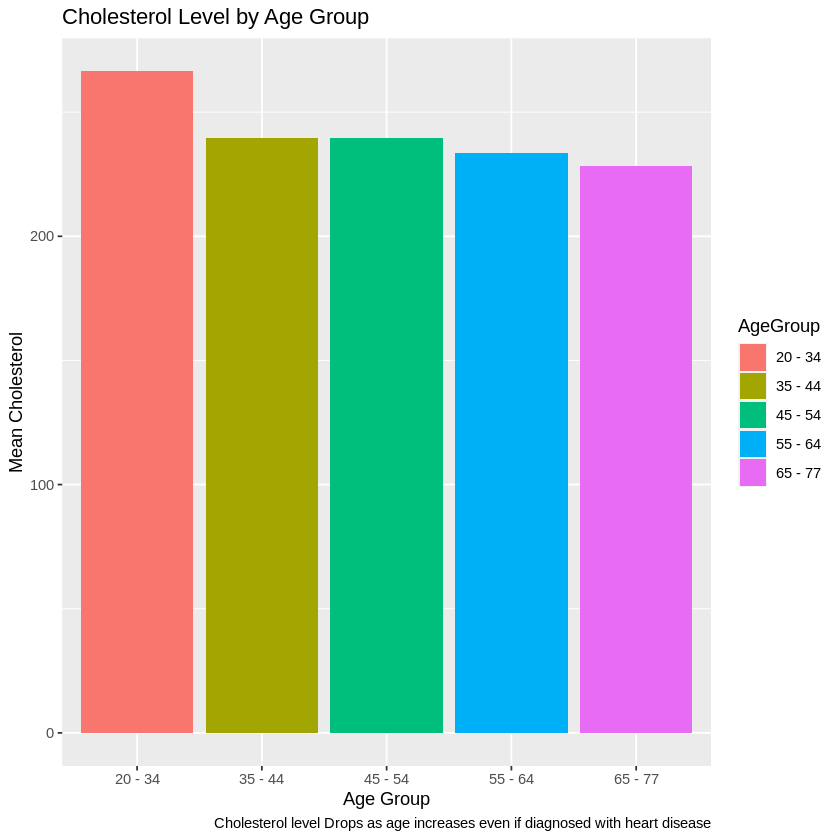

In [23]:
ggplot(data = sum_heart_df2, aes(x = AgeGroup, y = MeanCholesterol, fill = AgeGroup))+
  geom_bar(stat = 'identity') +
  labs(title = 'Cholesterol Level by Age Group',
       caption = 'Cholesterol level Drops as age increases even if diagnosed with heart disease',
       y = 'Mean Cholesterol',
       x = 'Age Group')

### 2. Density Plot of MaxHR among age groups

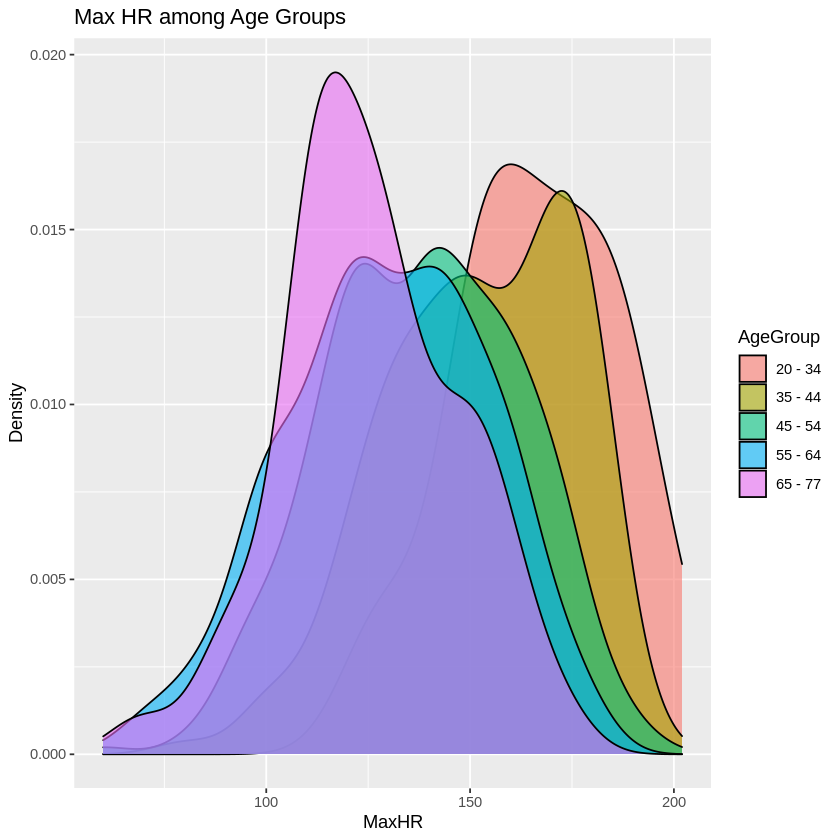

In [24]:
ggplot(data = heart_df2, aes(x = MaxHR)) + 
geom_density(aes(fill = AgeGroup), alpha = 0.6) + 
labs(title = "Max HR among Age Groups", x = "MaxHR", y = "Density", fill = "AgeGroup")

### 3. Scatter Plot of Resting Blood Pressure and Maximum Heart Rate

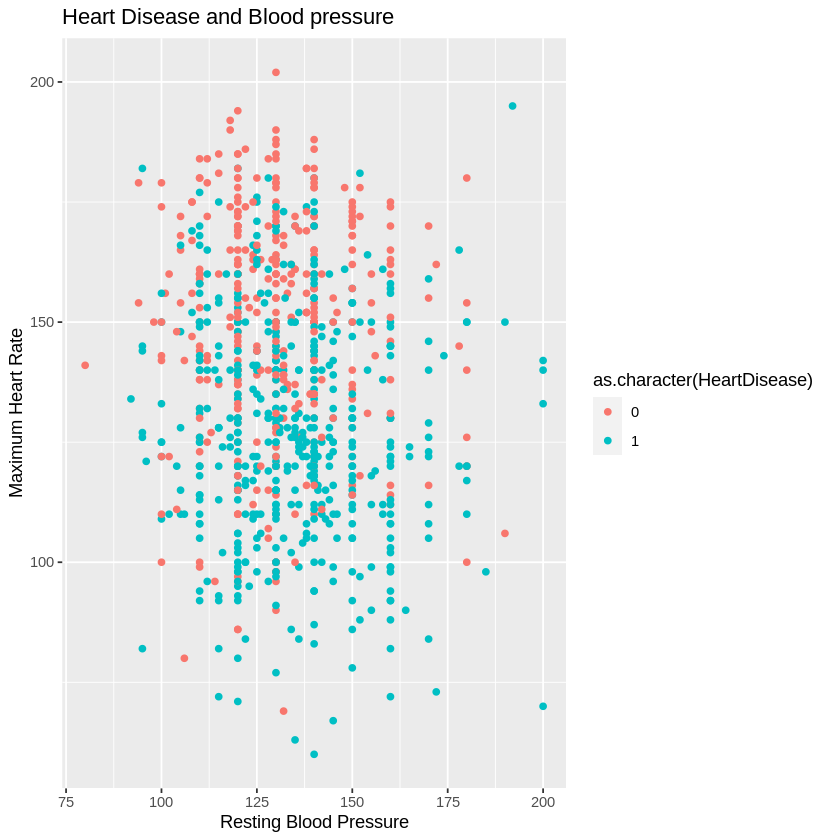

In [25]:
ggplot(data = heart_df, aes(x = RestingBP, y = MaxHR, color = as.character(HeartDisease)))+
  geom_point() +
  labs(title = 'Heart Disease and Blood pressure',
       x = 'Resting Blood Pressure',
       y = 'Maximum Heart Rate')

### 4. Bar Plot for Distribution of Chest Pain in Males and Females


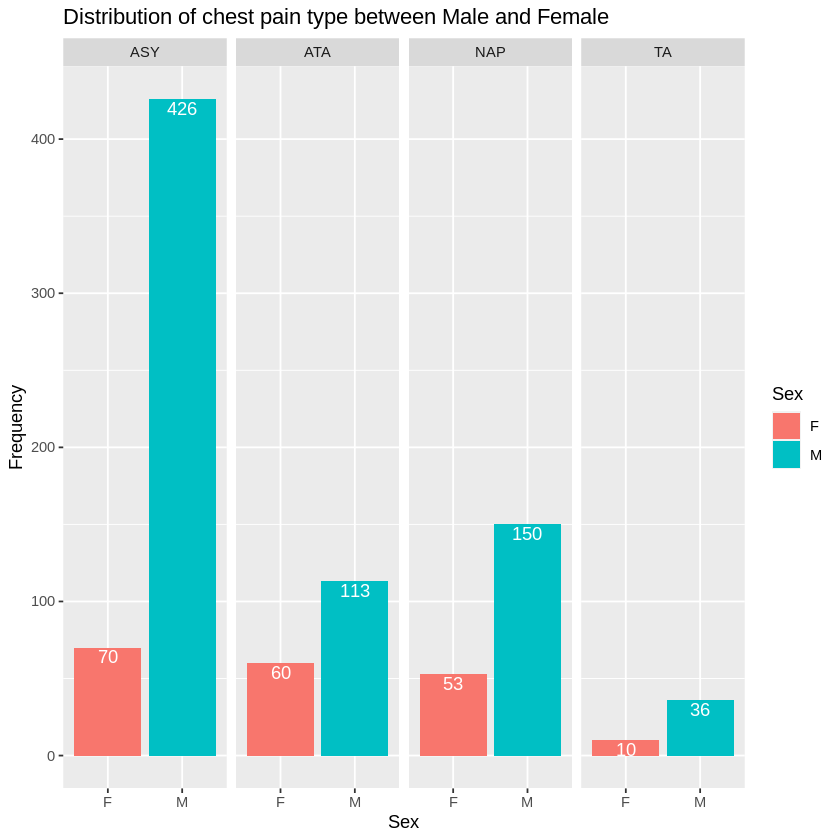

In [26]:
ggplot(data = heart_df, aes(x= Sex, fill = Sex)) +
  geom_bar()+
  facet_grid(~ChestPainType) +
  geom_text(aes(label = ..count..), 
            stat = 'count', vjust = 1.2, colour = 'white') +
  labs(title = 'Distribution of chest pain type between Male and Female',
       y = 'Frequency')

### 5. Smooth line plot for Age vs Old Peak

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



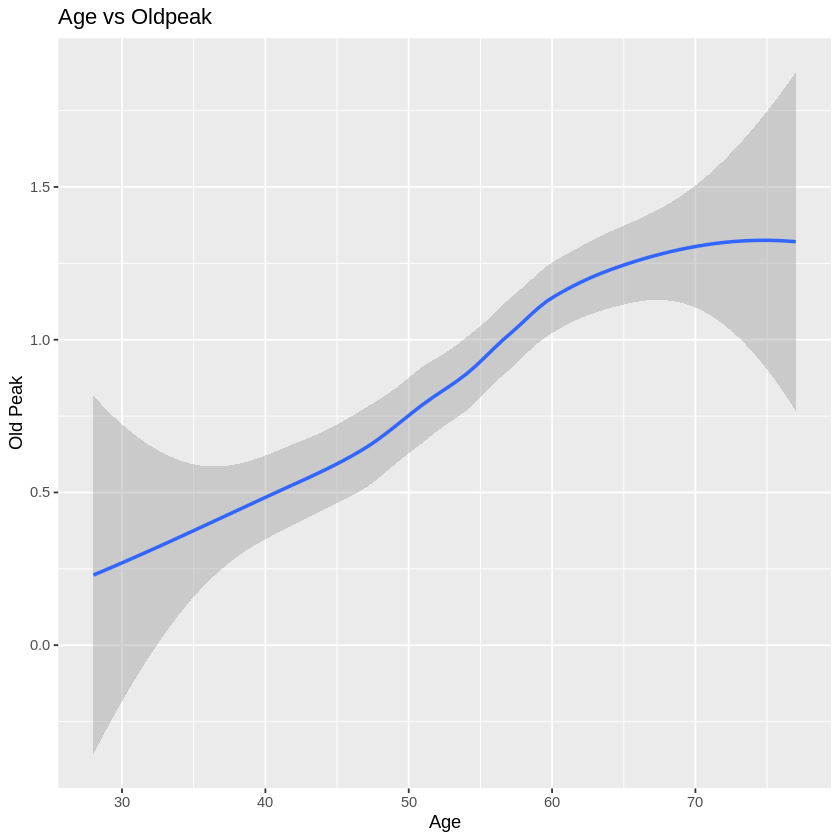

In [27]:
graph_data <- heart_df %>%
  select(Age, Oldpeak)

ggplot(graph_data, aes(x = Age, y = Oldpeak)) + geom_smooth() + labs(title = "Age vs Oldpeak", x = "Age", y = "Old Peak")

## Creating logistic regression model for prediction

We have made use of logistic regression for prediction in our dataset since Logistic regression is a very useful algorithm for modeling a binomial outcome with one or more explanatory variables. In our case our binary variable which needs to be predicted is the presence or absence of Heart Disease (0 or 1) with its dependent variables such as Chest Pain Type, Cholesterol, Heart Rate etc.
Our model predicts the probability of the binary variable Heart Disease based on its predictor variables.


Splitting Dataset

In [30]:
split <- sample.split(heart_df$HeartDisease,SplitRatio = 0.8)
train <- subset(heart_df,split==T)
test <- subset(heart_df,split==F)

Creating logistic regression model

In [31]:
model <- glm(HeartDisease ~ ., train, family = binomial)
summary(model)


Call:
glm(formula = HeartDisease ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5581  -0.3938   0.1863   0.4493   2.5627  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.1564770  1.6412721  -0.705 0.481045    
Age               0.0172853  0.0145040   1.192 0.233355    
SexM              1.6763771  0.3181464   5.269 1.37e-07 ***
ChestPainTypeATA -1.8885545  0.3689725  -5.118 3.08e-07 ***
ChestPainTypeNAP -1.3777269  0.2989419  -4.609 4.05e-06 ***
ChestPainTypeTA  -1.5221408  0.4674988  -3.256 0.001130 ** 
RestingBP         0.0038846  0.0070013   0.555 0.579004    
Cholesterol      -0.0008628  0.0020984  -0.411 0.680959    
FastingBS         1.2489057  0.2974444   4.199 2.68e-05 ***
RestingECGNormal -0.0303765  0.2945281  -0.103 0.917855    
RestingECGST      0.0850311  0.3872908   0.220 0.826219    
MaxHR            -0.0099792  0.0055211  -1.807 0.070690 .  
ExerciseAnginaY   0

Based on p values, removing Resting BP, Resting ECG, Cholesterol, and Max HR from the model

In [32]:
model <- glm(HeartDisease ~ . -RestingBP -RestingECG -Cholesterol -MaxHR, train, family = binomial)

In [33]:
summary(model)


Call:
glm(formula = HeartDisease ~ . - RestingBP - RestingECG - Cholesterol - 
    MaxHR, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5973  -0.3819   0.1918   0.4622   2.6632  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.81338    0.92262  -3.049 0.002293 ** 
Age               0.02777    0.01317   2.108 0.034990 *  
SexM              1.74071    0.31174   5.584 2.35e-08 ***
ChestPainTypeATA -1.94787    0.36386  -5.353 8.63e-08 ***
ChestPainTypeNAP -1.46228    0.29208  -5.006 5.54e-07 ***
ChestPainTypeTA  -1.62120    0.46514  -3.485 0.000491 ***
FastingBS         1.28105    0.29516   4.340 1.42e-05 ***
ExerciseAnginaY   0.87136    0.26488   3.290 0.001003 ** 
Oldpeak           0.39018    0.12313   3.169 0.001530 ** 
ST_SlopeFlat      1.11944    0.49416   2.265 0.023491 *  
ST_SlopeUp       -1.26845    0.50784  -2.498 0.012499 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

In [34]:
probs <- predict(model,test[-12],type='response')
results <- ifelse(probs > 0.5, 1, 0)

In [35]:
table(factor(results),test$HeartDisease)

   
     0  1
  0 70 13
  1 12 89

In [36]:
(70+89)/(70+89+12+13) * 100

[1] 86.41304

The Accuracy of our model is approximately 86%

Plotting Decison Tree

In [37]:
trainh <- train #using different dataset for the decision tree
testh <- test #using different dataset for testing
trainh$HeartDisease <- as.factor(trainh$HeartDisease) #change dependent variable to factor
testh$HeartDisease <- as.factor(testh$HeartDisease) #do same for test data

In [40]:
hearttree <- rpart(formula = HeartDisease~., data = trainh,
                   method = 'class', control = rpart.control(maxdepth = 3))

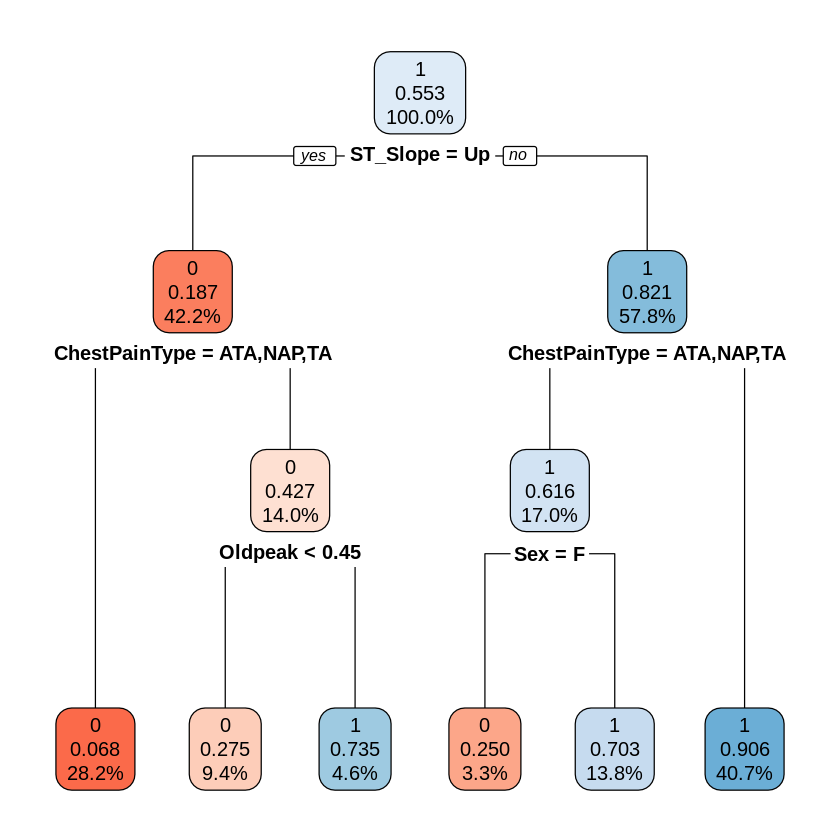

In [43]:
rpart.plot(hearttree, box.palette = 'RdBu', digits = -3) #have a view of the full tree

### Conclusion:
From the statistics of the dataset and the model we can conclude that in general, people with heart disease are:
*   older
*   with higher resting blood pressure
*   with higher cholesterol level
*   more likely to have fasting blood sugar level over 120 mg/dl, which is an indicator to diabetes
*   achieving a lower maximum heart rate
*   more likely to have exercise angina
*  with a higher oldpeak

